In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [37]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [2]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")

In [3]:
data.shape

(6093, 23)

In [4]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [9]:
data['class'].value_counts()

0    3153
1    2940
Name: class, dtype: int64

In [18]:
X = data.drop('class', axis=1)
y = data['class']

In [14]:
parameters = {
    'n_estimators' : range(10,51,10),
    'max_depth' : range(1,13,2),
    'min_samples_leaf' : range(1,8),
    'min_samples_split' : range(2,10,2)
}

In [17]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv=3, n_jobs=-1)

In [19]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [20]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [21]:
clf.best_estimator_.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

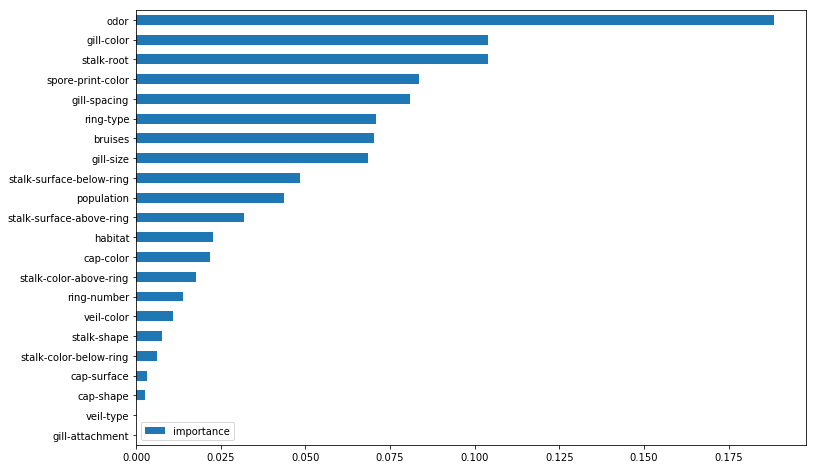

In [22]:
imp = pd.DataFrame(clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [23]:
data_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/testing_mush.csv")

In [24]:
data_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [25]:
y_pred = clf.best_estimator_.predict(data_test)

In [27]:
sum(y_pred == 1)

976

In [28]:
sum(y_pred == 0)

1055

In [30]:
y_true = pd.read_csv("../data/testing_y_mush.csv")

In [32]:
confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

Confusion matrix, without normalization
[[1055    0]
 [   0  976]]


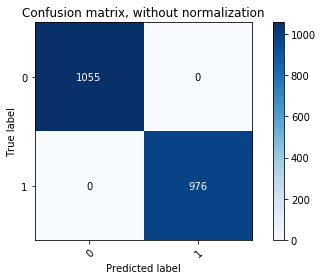

In [39]:
plot_confusion_matrix(y_true, y_pred, classes=np.array([0,1]),
                      title='Confusion matrix, without normalization');

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


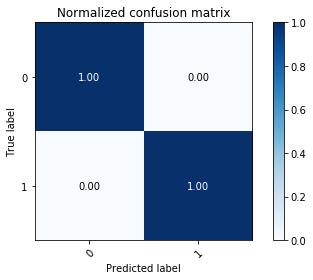

In [43]:
plot_confusion_matrix(y_true, y_pred, classes=np.array([0,1]), normalize=True,
                      title='Normalized confusion matrix');

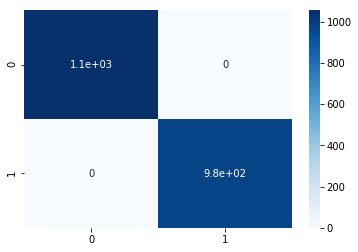

In [45]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues");

In [3]:
data_more = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")

In [4]:
data_more.shape

(100000, 8)